      CO_S  NMHC_S  NOx_S  NO2_S  O3_S     T    RH      AH
0     1383    1020   1008   1719  1104   9.8  67.6  0.8185
1     1581    1319    799   2083  1409  10.3  64.2  0.8065
2     1776    1488    702   2333  1704   9.7  69.3  0.8319
3     1640    1404    743   2191  1654   9.6  67.8  0.8133
4     1313    1076    957   1707  1285   9.1  64.0  0.7419
...    ...     ...    ...    ...   ...   ...   ...     ...
7389  1248    1018    599   1289  1167  19.9  33.0  0.7608
7390  1180     894    636   1200  1372  17.5  40.7  0.8073
7391  1102     812    693   1178  1042  16.4  46.6  0.8642
7392  1116     803    696   1173  1055  15.5  49.0  0.8579
7393  1100     769    722   1147  1049  14.3  52.5  0.8497

[7394 rows x 8 columns]
[[ 1.24578021  0.26390154  0.70910999 ... -0.90717913  1.07515824
  -0.4380058 ]
 [ 2.15263402  1.38878006 -0.1027633  ... -0.85162289  0.88075808
  -0.46774088]
 [ 3.04574762  2.02458097 -0.47956573 ... -0.91829038  1.17235832
  -0.40480162]
 ...
 [-0.04121939 -0.51

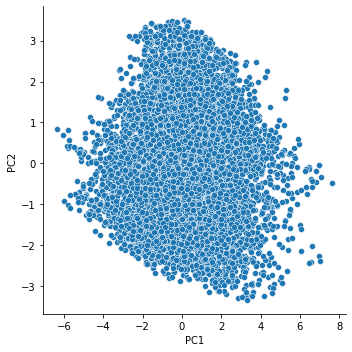

In [1]:
# %load AirQualityUCI_ksy PC Q_2.py
"""
Created on Sat Mar 19 11:20:57 2022

"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

#%%
air_data = pd.read_csv('AirQuality_Clean.csv', 
                       header=None, 
                       sep = '[,]',
                       usecols = [4,5,6,7,8,9,10,11,12,13,14,15,16],
                       engine='python')
air_data.columns = ["CO", "CO_S", "NMHC", "C6H6", "NMHC_S", "NOx", "NOx_S", 
                    "NO2", "NO2_S", "O3_S", "T", "RH", "AH"]
#print(air_data)


air_data_sensor1 = air_data[['CO_S', 'NMHC_S', 'NOx_S', 'NO2_S', 'O3_S',
                             "T", "RH", "AH"]]
print(air_data_sensor1)
#sns.pairplot(air_data_sensor1) 
#------------------------------------------------------

#scaling
x = StandardScaler().fit_transform(air_data_sensor1) 
print(x)

#PCA PC1 and PC2
pca = PCA(n_components=2)
PCs = pca.fit_transform(x)  
#print(principalComponents) 
principalDf = pd.DataFrame(data=PCs, columns=['PC1', 'PC2'])  
print(principalDf)  


#plt.scatter(x=principalDf['PC1'], y=principalDf['PC2'])
sns.relplot(data=principalDf, x='PC1', y='PC2')
    
# <==여기 PC1, PC2 좌표로 나타낸 2D평면의 값들이 센서신호 8개 중(CO_S, NMHC_S, NOx_S, NO2_S, O3_S, T, RH, AH)
# 어느 신호에서 왔는지 그림에서 색깔을 달리하여 구분하려면 어떻게 하면 좋을지요?
 #-

    
                                                                                                                                                                       









In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
air_data.columns

Index(['CO', 'CO_S', 'NMHC', 'C6H6', 'NMHC_S', 'NOx', 'NOx_S', 'NO2', 'NO2_S',
       'O3_S', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
air_data = pd.read_csv('AirQuality_Clean.csv', 
                       header=None, 
                       sep = '[,]',
                       usecols = [4,5,6,7,8,9,10,11,12,13,14,15,16],
                       engine='python')

In [5]:
air_data.shape

(7394, 13)

In [6]:
air_data.columns

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [7]:
air_data.columns = ["CO", "CO_S", "NMHC", "C6H6", "NMHC_S", "NOx", "NOx_S", 
                    "NO2", "NO2_S", "O3_S", "T", "RH", "AH"]

In [8]:
air_data.head()

,CO,CO_S,NMHC,C6H6,NMHC_S,NOx,NOx_S,NO2,NO2_S,O3_S,T,RH,AH
0,2.9,1383,150.0,11.2,1020,243.0,1008,135.0,1719,1104,9.8,67.6,0.8185
1,4.8,1581,307.0,20.8,1319,281.0,799,151.0,2083,1409,10.3,64.2,0.8065
2,6.9,1776,461.0,27.4,1488,383.0,702,172.0,2333,1704,9.7,69.3,0.8319
3,6.1,1640,401.0,24.0,1404,351.0,743,165.0,2191,1654,9.6,67.8,0.8133
4,3.9,1313,197.0,12.8,1076,240.0,957,136.0,1707,1285,9.1,64.0,0.7419


In [9]:
air_data_sensor1 = air_data[['CO_S', 'NMHC_S', 'NOx_S', 'NO2_S', 'O3_S',
                             "T", "RH", "AH"]]

In [10]:
air_data_sensor1.head()

,CO_S,NMHC_S,NOx_S,NO2_S,O3_S,T,RH,AH
0,1383,1020,1008,1719,1104,9.8,67.6,0.8185
1,1581,1319,799,2083,1409,10.3,64.2,0.8065
2,1776,1488,702,2333,1704,9.7,69.3,0.8319
3,1640,1404,743,2191,1654,9.6,67.8,0.8133
4,1313,1076,957,1707,1285,9.1,64.0,0.7419


In [11]:
air_data_sensor1.shape

(7394, 8)

In [12]:
#scaling
x = StandardScaler().fit_transform(air_data_sensor1) 

In [13]:
df_x = pd.DataFrame(x)

In [14]:
df_x.columns = ['CO_S', 'NMHC_S', 'NOx_S', 'NO2_S', 'O3_S',"T", "RH", "AH"]

In [15]:
df_x.head()

,CO_S,NMHC_S,NOx_S,NO2_S,O3_S,T,RH,AH
0,1.245780,0.263902,0.709110,0.755681,0.145767,-0.907179,1.075158,-0.438006
1,2.152634,1.388780,-0.102763,1.785923,0.896942,-0.851623,0.880758,-0.467741
2,3.045748,2.024581,-0.479566,2.493506,1.623489,-0.918290,1.172358,-0.404802
3,2.422858,1.708562,-0.320299,2.091599,1.500346,-0.929402,1.086594,-0.450891
4,0.925175,0.474581,0.510997,0.721717,0.591546,-0.984958,0.869323,-0.627815


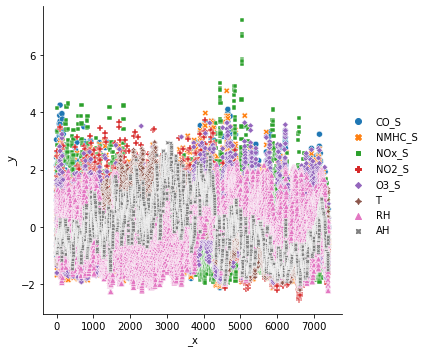

In [16]:
sns.relplot(data=df_x)

## PCA로 처리하면 기존 것을 확인할 수 없음 

In [17]:
#PCA PC1 and PC2
pca = PCA(n_components=3)
PCs = pca.fit_transform(x)  
#print(principalComponents) 
principalDf = pd.DataFrame(data=PCs, columns=['PC1', 'PC2'])  

In [18]:
principalDf.head()

,PC1,PC2,PC3
0,0.533943,-1.240860,0.664005
1,2.532801,-1.465724,0.258827
2,3.984877,-1.900278,0.358989
3,3.266915,-1.786801,0.325723
4,0.690871,-1.398472,0.320012


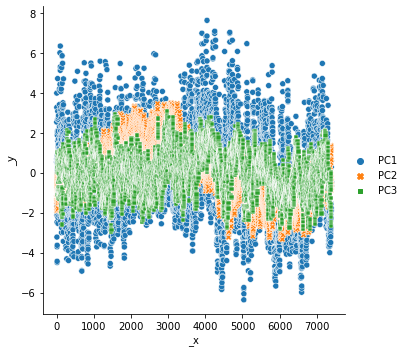

In [19]:
sns.relplot(data=principalDf)

In [20]:
df_pca = pd.DataFrame(data=PCs, columns=['PC1', 'PC2',"PC3"])  

In [21]:
df_pca.shape

(7394, 3)

In [22]:
df_x.columns

Index(['CO_S', 'NMHC_S', 'NOx_S', 'NO2_S', 'O3_S', 'T', 'RH', 'AH'], dtype='object')

In [23]:
df_pca_cos = df_pca.copy()

In [24]:
df_pca_cos['CO_S'] = df_x['CO_S']

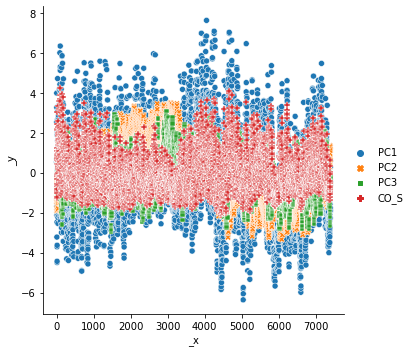

In [25]:
sns.relplot(data=df_pca_cos)

In [26]:
import matplotlib.pyplot as plt

sns.set_palette("Set2")

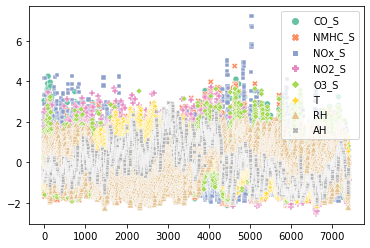

In [27]:
sns.scatterplot( data=df_x, palette="Set2");

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)